In [1]:
import numpy as np
import pandas as pd

# Data Cleaning

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180


In [3]:
#drop id column
df.drop('Id',axis=1,inplace=True)
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Make                   54937 non-null  object
 1   Vehicle Class          54398 non-null  object
 2   Engine Size(L)         53544 non-null  object
 3   Cylinders              53739 non-null  object
 4   Transmission           54527 non-null  object
 5   Fuel Type              54391 non-null  object
 6   Fuel Consumption City  53369 non-null  object
 7   Fuel Consumption Hwy   53236 non-null  object
 8   Fuel Consumption Comb  53263 non-null  object
 9   CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 4.2+ MB


In [5]:
#check for missing value
df.isna().sum()

Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
dtype: int64

In [6]:
#check for duplicate sample
df.duplicated().sum()

0

In [7]:
#check 'Make' class
df['Make'].unique()

array(['MITSU', 'TOYOTI', 'MATSUDA', 'CHEVO', 'DOGE', 'BMV', 'LECUS',
       'KIO', 'FOLD', 'JIPU', 'NIRRAN', 'CADILUXE', 'FOLKSWA', 'BARUSU',
       'GONDA', 'LAND CRAWLER', 'RYUNDAI', 'TOLVO', 'FIAR', 'ASURA',
       'LAMBOGI'], dtype=object)

In [8]:
df['Vehicle Class'].unique()

array(['SUV - SMALL', 'PICKUP TRUCK - SMALL', 'COMPACT',
       'VAN - PASSENGER', 'MID-SIZE', 'SUV - STANDARD',
       'STATION WAGON - SMALL', 'FULL-SIZE', 'TWO-SEATER',
       'PICKUP TRUCK - STANDARD', 'SUBCOMPACT', nan,
       'STATION WAGON - MID-SIZE', 'MINICOMPACT', 'MINIVAN',
       'not-available', 'not-recorded', 'SPECIAL PURPOSE VEHICLE',
       'missing', 'unestablished', 'na', 'unknown', 'unspecified',
       'VAN - CARGO'], dtype=object)

In [9]:
df['Transmission'].unique()

array(['AV8', 'A5', 'AS6', 'A6', 'M6', 'M5', 'A9', 'AS8', 'AV', 'AM6',
       'AS10', 'A8', 'AS9', 'unestablished', 'AM8', 'AM7', 'AV7', 'A4',
       'not-recorded', 'AV6', 'missing', 'unspecified', 'AV10', 'AS5',
       'M7', 'A10', 'na', 'AS7', 'not-available', 'unknown', nan, 'A7',
       'AM9'], dtype=object)

In [10]:
df['Fuel Type'].unique()

array(['X', 'Z', nan, 'E', 'missing', 'not-recorded', 'not-available',
       'D', 'unspecified', 'unknown', 'na', 'unestablished', 'N'],
      dtype=object)

In [11]:
#convert all "missingness" into np.nan
def clean_missing_type(x):
  missing_type=['missing','-1','not-recorded','unestablished',
                'not-available','na','unknown','unspecified',
                ]
  if x in missing_type:
    x=np.nan
  return x

In [12]:
df['Fuel Type']=df['Fuel Type'].apply(lambda x: clean_missing_type(x))
df['Vehicle Class']=df['Vehicle Class'].apply(lambda x: clean_missing_type(x))
df['Transmission']=df['Transmission'].apply(lambda x: clean_missing_type(x))

In [13]:
df['Transmission'].unique()

array(['AV8', 'A5', 'AS6', 'A6', 'M6', 'M5', 'A9', 'AS8', 'AV', 'AM6',
       'AS10', 'A8', 'AS9', nan, 'AM8', 'AM7', 'AV7', 'A4', 'AV6', 'AV10',
       'AS5', 'M7', 'A10', 'AS7', 'A7', 'AM9'], dtype=object)

In [14]:
#extract gears from transmission variable
def gear_feature(x):
  if not isinstance(x,float):
    x=x[-1]
    try:
      x=float(x)
      if x==0.0:
        x=10.0
    except ValueError:
      x=np.nan
  return x

In [15]:
df['Gears']=df['Transmission'].apply(lambda x: gear_feature(x))
df['Gears'].unique()

array([ 8.,  5.,  6.,  9., nan, 10.,  7.,  4.])

In [16]:
df.isna().sum()

Make                        0
Vehicle Class            2051
Engine Size(L)           1393
Cylinders                1198
Transmission             1483
Fuel Type                1942
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
Gears                    4646
dtype: int64

In [17]:
df['Engine Size(L)'].unique()

array(['1.5', 'not-available', '2.0', 'unknown', '1.8', '2.4', '3.5',
       '2.7', '1.6', 'na', '1.2', '2.5', '3.2', '5.0', '8.4', '1.4',
       '3.8', 'unestablished', '6.2', nan, '4.4', '3.0', '3.6', '5.7',
       '5.2', '6.4', '2.3', 'not-recorded', '3.3', '5.3', 'missing',
       '6.5', '1.0', '4.0', '3.7', '1.3', 'unspecified', '4.6', '4.8',
       '5.6', '2.8', '6.0', '4.2', '4.3', '2.2', '6.6', '5.4', '3.4',
       '5.8', '6.8'], dtype=object)

In [18]:
df['Engine Size(L)']=df['Engine Size(L)'].apply(lambda x: clean_missing_type(x))
df['Engine Size(L)']=df['Engine Size(L)'].apply(lambda x: float(x))
df['Engine Size(L)'].unique()

array([1.5, nan, 2. , 1.8, 2.4, 3.5, 2.7, 1.6, 1.2, 2.5, 3.2, 5. , 8.4,
       1.4, 3.8, 6.2, 4.4, 3. , 3.6, 5.7, 5.2, 6.4, 2.3, 3.3, 5.3, 6.5,
       1. , 4. , 3.7, 1.3, 4.6, 4.8, 5.6, 2.8, 6. , 4.2, 4.3, 2.2, 6.6,
       5.4, 3.4, 5.8, 6.8])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   54937 non-null  object 
 1   Vehicle Class          52886 non-null  object 
 2   Engine Size(L)         49673 non-null  float64
 3   Cylinders              53739 non-null  object 
 4   Transmission           53454 non-null  object 
 5   Fuel Type              52995 non-null  object 
 6   Fuel Consumption City  53369 non-null  object 
 7   Fuel Consumption Hwy   53236 non-null  object 
 8   Fuel Consumption Comb  53263 non-null  object 
 9   CO2 Emissions(g/km)    54937 non-null  int64  
 10  Gears                  50291 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 4.6+ MB


In [20]:
df['Cylinders'].unique()

array(['4.0', '6.0', '8.0', 'unknown', 'na', '3.0', '10.0',
       'not-recorded', 'unspecified', '12.0', nan, '5.0', 'missing',
       'not-available', 'unestablished'], dtype=object)

In [21]:
df['Cylinders']=df['Cylinders'].apply(lambda x: clean_missing_type(x))
df['Cylinders']=df['Cylinders'].apply(lambda x: float(x))
df['Cylinders'].unique()

array([ 4.,  6.,  8., nan,  3., 10., 12.,  5.])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   54937 non-null  object 
 1   Vehicle Class          52886 non-null  object 
 2   Engine Size(L)         49673 non-null  float64
 3   Cylinders              50414 non-null  float64
 4   Transmission           53454 non-null  object 
 5   Fuel Type              52995 non-null  object 
 6   Fuel Consumption City  53369 non-null  object 
 7   Fuel Consumption Hwy   53236 non-null  object 
 8   Fuel Consumption Comb  53263 non-null  object 
 9   CO2 Emissions(g/km)    54937 non-null  int64  
 10  Gears                  50291 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.6+ MB


In [23]:
df['Fuel Consumption Hwy']=df['Fuel Consumption Hwy'].apply(lambda x: clean_missing_type(x))
df['Fuel Consumption Comb']=df['Fuel Consumption Comb'].apply(lambda x: clean_missing_type(x))
df['Fuel Consumption City']=df['Fuel Consumption City'].apply(lambda x: clean_missing_type(x))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   54937 non-null  object 
 1   Vehicle Class          52886 non-null  object 
 2   Engine Size(L)         49673 non-null  float64
 3   Cylinders              50414 non-null  float64
 4   Transmission           53454 non-null  object 
 5   Fuel Type              52995 non-null  object 
 6   Fuel Consumption City  52967 non-null  object 
 7   Fuel Consumption Hwy   52813 non-null  object 
 8   Fuel Consumption Comb  52829 non-null  object 
 9   CO2 Emissions(g/km)    54937 non-null  int64  
 10  Gears                  50291 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.6+ MB


In [25]:
#check for unique unit of fuel consumption variables
def check_unit(x):
  try:
    x=x.split(' ')[1:]
    x=' '.join(x)
  except AttributeError:
    return x
  return x

In [26]:
df['Fuel Consumption City'].apply(lambda x: check_unit(x)).unique()

array(['km/L', 'km per L', 'L/10km', 'L/100km', nan, 'MPG (AS)',
       'liters per 100 km', 'mpg Imp.', 'L/100 km', ''], dtype=object)

In [27]:
df['Fuel Consumption Hwy'].apply(lambda x: check_unit(x)).unique()

array(['L/10km', 'L/100km', 'mpg Imp.', 'liters per 100 km', 'MPG (AS)',
       'km/L', nan, 'L/100 km', 'km per L', ''], dtype=object)

In [28]:
df['Fuel Consumption Comb'].apply(lambda x: check_unit(x)).unique()

array(['L/10km', 'L/100km', 'mpg Imp.', 'liters per 100 km', 'MPG (AS)',
       nan, 'km per L', 'L/100 km', 'km/L', ''], dtype=object)

In [29]:
#there are some sample without unit in fuel consumption variable, this is to check which samples that don't have unit
def test_function(x):
  try:
    x=x.split(' ')[1:]
    x=' '.join(x)
  except AttributeError:
    return False
  if len(x)==0:
    return True
  else:
    return False

In [30]:
df[df['Fuel Consumption Comb'].apply(lambda x: test_function(x))]['Fuel Consumption Comb'].unique()

array(['zero'], dtype=object)

In [31]:
df[df['Fuel Consumption Hwy'].apply(lambda x: test_function(x))]['Fuel Consumption Hwy'].unique()

array(['zero'], dtype=object)

In [32]:
df[df['Fuel Consumption City'].apply(lambda x: test_function(x))]['Fuel Consumption City'].unique()

array(['zero'], dtype=object)

In [33]:
#convert all possible unit to same unit, km/L
def clean_fuel_unit(x):
  try:
    num=x.split(' ')[0]
    unit=x.split(' ')[1:]
    unit=' '.join(unit)
    match unit:
      case 'mpg Imp.':
        num=float(num)
        num=num*0.35400619
        return num
      case 'L/100 km':
        num=float(num)
        num=num*100
        return num
      case 'L/10km':
        num=float(num)
        num=num*10
        return num
      case 'MPG (AS)':
        num=float(num)
        num=num*0.4251437075
        return num
      case 'km/L':
        num=float(num)
        return num
      case 'L/100km':
        num=float(num)
        num=num*100
        return num
      case 'km per L':
        num=float(num)
        return num
      case 'liters per 100 km':
        num=float(num)
        num=num*100
        return num
      case '':
        return np.nan
  except AttributeError:
    return x

In [34]:
df['Fuel Consumption City']=df['Fuel Consumption City'].apply(lambda x: clean_fuel_unit(x))
df['Fuel Consumption Hwy']=df['Fuel Consumption Hwy'].apply(lambda x: clean_fuel_unit(x))
df['Fuel Consumption Comb']=df['Fuel Consumption Comb'].apply(lambda x: clean_fuel_unit(x))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   54937 non-null  object 
 1   Vehicle Class          52886 non-null  object 
 2   Engine Size(L)         49673 non-null  float64
 3   Cylinders              50414 non-null  float64
 4   Transmission           53454 non-null  object 
 5   Fuel Type              52995 non-null  object 
 6   Fuel Consumption City  52612 non-null  float64
 7   Fuel Consumption Hwy   52374 non-null  float64
 8   Fuel Consumption Comb  52385 non-null  float64
 9   CO2 Emissions(g/km)    54937 non-null  int64  
 10  Gears                  50291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [36]:
df.isna().sum()

Make                        0
Vehicle Class            2051
Engine Size(L)           5264
Cylinders                4523
Transmission             1483
Fuel Type                1942
Fuel Consumption City    2325
Fuel Consumption Hwy     2563
Fuel Consumption Comb    2552
CO2 Emissions(g/km)         0
Gears                    4646
dtype: int64

In [37]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),Gears
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40,7.200000,9.800000,208,8.0
1,TOYOTI,PICKUP TRUCK - SMALL,NaN,6.0,A5,X,7.25,970.000000,1196.000000,325,5.0
2,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80,13.700040,11.243237,170,6.0
3,CHEVO,VAN - PASSENGER,NaN,8.0,A6,X,17.30,1170.000000,1478.000000,362,6.0
4,TOYOTI,COMPACT,1.8,4.0,M6,X,810.00,12.659261,801.000000,180,6.0


In [38]:
#exclude gear from transmission variable
def transmission_feature(x):
  try:
    if x[-1]=='0':
      x=x[:-2]
    elif x=='AV':
      return x
    else:
      x=x[:-1]
    return x
  except TypeError:
    return x

In [39]:
df['Transmission']=df['Transmission'].apply(lambda x: transmission_feature(x))
df['Transmission'].unique()

array(['AV', 'A', 'AS', 'M', 'AM', nan], dtype=object)

In [40]:
cat_col=['Make','Vehicle Class','Transmission','Fuel Type']
num_col=list(set(df.columns)-set(cat_col)-set(['CO2 Emissions(g/km)']))
num_col

['Fuel Consumption Comb',
 'Gears',
 'Fuel Consumption Hwy',
 'Engine Size(L)',
 'Fuel Consumption City',
 'Cylinders']

In [41]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),Gears
count,49673.000000,50414.000000,52612.000000,52374.000000,52385.000000,54937.000000,50291.000000
mean,2.978387,5.292379,477.744671,350.822442,420.660327,246.688680,6.733074
std,1.303561,1.600217,648.295299,460.614212,559.940852,67.571095,1.274595
min,1.000000,3.000000,3.280000,4.800000,3.950000,96.000000,4.000000
25%,2.000000,4.000000,8.400000,10.202458,9.190001,197.000000,6.000000
50%,2.500000,4.000000,11.490000,13.510000,11.963544,233.000000,6.000000
75%,3.600000,6.000000,1050.000000,780.000000,934.000000,290.000000,8.000000
max,8.400000,12.000000,3050.000000,2050.000000,2520.000000,522.000000,10.000000


In [42]:
df.isna().sum()

Make                        0
Vehicle Class            2051
Engine Size(L)           5264
Cylinders                4523
Transmission             1483
Fuel Type                1942
Fuel Consumption City    2325
Fuel Consumption Hwy     2563
Fuel Consumption Comb    2552
CO2 Emissions(g/km)         0
Gears                    4646
dtype: int64

In [43]:
df['Fuel Consumption City']=np.log(df['Fuel Consumption City'])
df['Fuel Consumption Comb']=np.log(df['Fuel Consumption Comb'])
df['Fuel Consumption Hwy']=np.log(df['Fuel Consumption Hwy'])
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),Gears
count,49673.000000,50414.000000,52612.000000,52374.000000,52385.000000,54937.000000,50291.000000
mean,2.978387,5.292379,4.032972,4.034184,4.033829,246.688680,6.733074
std,1.303561,1.600217,2.392936,2.153783,2.293924,67.571095,1.274595
min,1.000000,3.000000,1.187843,1.568616,1.373716,96.000000,4.000000
25%,2.000000,4.000000,2.128232,2.322629,2.218116,197.000000,6.000000
50%,2.500000,4.000000,2.441477,2.603430,2.481864,233.000000,6.000000
75%,3.600000,6.000000,6.956545,6.659294,6.839476,290.000000,8.000000
max,8.400000,12.000000,8.022897,7.625595,7.832014,522.000000,10.000000


# Modelling + Cross Validation

In [44]:
import optuna
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.impute import KNNImputer
cv=KFold(5,shuffle=True,random_state=42)

def objective(trial):
    X=df.drop('CO2 Emissions(g/km)',axis=1)
    y=df['CO2 Emissions(g/km)']
    depth=trial.suggest_int("max_depth",6,20,step=1)
    estimators=trial.suggest_int("n_estimators",100,900,step=100)
    subsample=trial.suggest_float("subsample",0.5,1,step=0.1)
    colsample=trial.suggest_float("colsample_bytree",0.5,1,step=0.1)
    reg_alpha=trial.suggest_float("reg_alpha",0,2e-1,step=0.025)
    reg_lambda=trial.suggest_float("reg_lambda",0,2e-1,step=0.025)
    leaves=trial.suggest_int("num_leaves",12,40,step=2)
    lr=trial.suggest_float("learning_rate",0.05,0.3,step=0.05)
    bin_sample=trial.suggest_int("subsample_for_bin",200000,400000,step=16)

    n_neighbor=trial.suggest_int('n_neighbors',5,30,step=1)

    encoder=OneHotEncoder(sparse_output=False)
    encoder.set_output(transform='pandas')
    encoded=encoder.fit_transform(X[cat_col])

    for col in encoded.columns:
      if '_nan' in col:
        encoded.drop(col,axis=1,inplace=True) #make nan categories as base level
    encoded.drop('Make_ASURA',axis=1,inplace=True)

    X.drop(cat_col,axis=1,inplace=True)
    X=pd.concat([X,encoded],axis=1)

    scaler=MinMaxScaler()
    scaler.set_output(transform='pandas')
    imputer=KNNImputer(weights='distance',n_neighbors=n_neighbor)
    imputer.set_output(transform='pandas')

    model=LGBMRegressor(num_leaves=leaves,
                      max_depth=depth,
                      learning_rate=lr,
                      n_estimators=estimators,
                      subsample=subsample,
                      colsample_bytree=colsample,
                      reg_alpha=reg_alpha,
                      reg_lambda=reg_lambda,
                      subsample_for_bin=bin_sample,
                      n_jobs=-1,
                      random_state=42)
    rmse=[]
    for i,(train,test) in enumerate(cv.split(X)):
       x_train=X.iloc[train]
       x_test=X.iloc[test]
       y_train=y.iloc[train]
       y_test=y.iloc[test]
       scaled_train=scaler.fit_transform(x_train)
       imputed_train=imputer.fit_transform(scaled_train)
       imputed_train=scaler.inverse_transform(imputed_train)
       x_train=pd.DataFrame(imputed_train,columns=x_train.columns)
       x_train['Engine Size(L)']=np.round(x_train['Engine Size(L)'],1)
       scaled_test=scaler.transform(x_test)
       imputed_test=imputer.transform(scaled_test)
       imputed_test=scaler.inverse_transform(imputed_test)
       x_test=pd.DataFrame(imputed_test,columns=x_test.columns)
       x_test['Engine Size(L)']=np.round(x_test['Engine Size(L)'],1)
       model.fit(x_train,y_train)
       y_pred=model.predict(x_test)
       rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    mean=np.mean(np.array(rmse))
    return -1*mean
    

In [45]:
sampler=optuna.samplers.TPESampler(seed=42)
study=optuna.create_study(sampler=sampler,direction='maximize')
study.optimize(objective,n_trials=100)

[I 2023-12-15 15:13:29,594] A new study created in memory with name: no-name-652b8dc1-6b89-4ac8-a60f-258b6bc674be


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead o

[I 2023-12-15 15:18:45,911] Trial 0 finished with value: -20.200455235451848 and parameters: {'max_depth': 11, 'n_estimators': 900, 'subsample': 0.9, 'colsample_bytree': 0.8, 'reg_alpha': 0.025, 'reg_lambda': 0.025, 'num_leaves': 12, 'learning_rate': 0.3, 'subsample_for_bin': 320224, 'n_neighbors': 23}. Best is trial 0 with value: -20.200455235451848.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-12-15 15:23:59,457] Trial 1 finished with value: -19.949372737666543 and parameters: {'max_depth': 6, 'n_estimators': 900, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.025, 'num_leaves': 20, 'learning_rate': 0.2, 'subsample_for_bin': 286384, 'n_neighbors': 12}. Best is trial 1 with value: -19.949372737666543.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used featur

[I 2023-12-15 15:29:11,110] Trial 2 finished with value: -20.268606402683908 and parameters: {'max_depth': 15, 'n_estimators': 200, 'subsample': 0.6, 'colsample_bytree': 0.7, 'reg_alpha': 0.1, 'reg_lambda': 0.17500000000000002, 'num_leaves': 16, 'learning_rate': 0.2, 'subsample_for_bin': 318480, 'n_neighbors': 6}. Best is trial 1 with value: -19.949372737666543.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

[I 2023-12-15 15:34:22,363] Trial 3 finished with value: -21.271719911166162 and parameters: {'max_depth': 15, 'n_estimators': 200, 'subsample': 0.5, 'colsample_bytree': 1.0, 'reg_alpha': 0.2, 'reg_lambda': 0.17500000000000002, 'num_leaves': 20, 'learning_rate': 0.05, 'subsample_for_bin': 336848, 'n_neighbors': 16}. Best is trial 1 with value: -19.949372737666543.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 15:39:34,375] Trial 4 finished with value: -19.90155098461698 and parameters: {'max_depth': 7, 'n_estimators': 500, 'subsample': 0.5, 'colsample_bytree': 1.0, 'reg_alpha': 0.05, 'reg_lambda': 0.125, 'num_leaves': 20, 'learning_rate': 0.2, 'subsample_for_bin': 309344, 'n_neighbors': 9}. Best is trial 4 with value: -19.90155098461698.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead o

[I 2023-12-15 15:44:47,014] Trial 5 finished with value: -19.937395424256955 and parameters: {'max_depth': 20, 'n_estimators': 700, 'subsample': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.125, 'reg_lambda': 0.2, 'num_leaves': 14, 'learning_rate': 0.1, 'subsample_for_bin': 209040, 'n_neighbors': 13}. Best is trial 4 with value: -19.90155098461698.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead o

[I 2023-12-15 15:49:56,946] Trial 6 finished with value: -19.98753425183586 and parameters: {'max_depth': 11, 'n_estimators': 300, 'subsample': 0.9, 'colsample_bytree': 0.7, 'reg_alpha': 0.05, 'reg_lambda': 0.1, 'num_leaves': 16, 'learning_rate': 0.25, 'subsample_for_bin': 214896, 'n_neighbors': 30}. Best is trial 4 with value: -19.90155098461698.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 15:55:07,731] Trial 7 finished with value: -20.47399312958526 and parameters: {'max_depth': 17, 'n_estimators': 200, 'subsample': 0.5, 'colsample_bytree': 0.9, 'reg_alpha': 0.15000000000000002, 'reg_lambda': 0.15000000000000002, 'num_leaves': 34, 'learning_rate': 0.05, 'subsample_for_bin': 271696, 'n_neighbors': 8}. Best is trial 4 with value: -19.90155098461698.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

[I 2023-12-15 16:00:20,037] Trial 8 finished with value: -19.937696052139792 and parameters: {'max_depth': 18, 'n_estimators': 600, 'subsample': 0.6, 'colsample_bytree': 0.5, 'reg_alpha': 0.05, 'reg_lambda': 0.05, 'num_leaves': 32, 'learning_rate': 0.2, 'subsample_for_bin': 377456, 'n_neighbors': 17}. Best is trial 4 with value: -19.90155098461698.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-12-15 16:05:31,828] Trial 9 finished with value: -19.89995796540243 and parameters: {'max_depth': 7, 'n_estimators': 700, 'subsample': 0.9, 'colsample_bytree': 0.8, 'reg_alpha': 0.15000000000000002, 'reg_lambda': 0.1, 'num_leaves': 26, 'learning_rate': 0.15000000000000002, 'subsample_for_bin': 205072, 'n_neighbors': 7}. Best is trial 9 with value: -19.89995796540243.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-12-15 16:10:45,850] Trial 10 finished with value: -19.76566773116114 and parameters: {'max_depth': 9, 'n_estimators': 700, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0.2, 'reg_lambda': 0.07500000000000001, 'num_leaves': 40, 'learning_rate': 0.1, 'subsample_for_bin': 242832, 'n_neighbors': 22}. Best is trial 10 with value: -19.76566773116114.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-12-15 16:15:59,236] Trial 11 finished with value: -19.764630948782937 and parameters: {'max_depth': 9, 'n_estimators': 700, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0.2, 'reg_lambda': 0.07500000000000001, 'num_leaves': 40, 'learning_rate': 0.1, 'subsample_for_bin': 243168, 'n_neighbors': 23}. Best is trial 11 with value: -19.764630948782937.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1425
[LightGBM] 

[I 2023-12-15 16:21:11,276] Trial 12 finished with value: -19.7589168878674 and parameters: {'max_depth': 10, 'n_estimators': 500, 'subsample': 0.7, 'colsample_bytree': 0.8, 'reg_alpha': 0.2, 'reg_lambda': 0.07500000000000001, 'num_leaves': 40, 'learning_rate': 0.1, 'subsample_for_bin': 250432, 'n_neighbors': 24}. Best is trial 12 with value: -19.7589168878674.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [W

[I 2023-12-15 16:26:24,489] Trial 13 finished with value: -19.779183464682696 and parameters: {'max_depth': 10, 'n_estimators': 400, 'subsample': 0.7, 'colsample_bytree': 0.9, 'reg_alpha': 0.17500000000000002, 'reg_lambda': 0.0, 'num_leaves': 40, 'learning_rate': 0.1, 'subsample_for_bin': 260128, 'n_neighbors': 24}. Best is trial 12 with value: -19.7589168878674.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 16:31:36,915] Trial 14 finished with value: -19.842339066068085 and parameters: {'max_depth': 12, 'n_estimators': 500, 'subsample': 0.7, 'colsample_bytree': 0.6, 'reg_alpha': 0.2, 'reg_lambda': 0.07500000000000001, 'num_leaves': 34, 'learning_rate': 0.15000000000000002, 'subsample_for_bin': 241328, 'n_neighbors': 28}. Best is trial 12 with value: -19.7589168878674.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replac

[I 2023-12-15 16:36:52,395] Trial 15 finished with value: -19.82545386810916 and parameters: {'max_depth': 9, 'n_estimators': 800, 'subsample': 0.8, 'colsample_bytree': 0.9, 'reg_alpha': 0.15000000000000002, 'reg_lambda': 0.07500000000000001, 'num_leaves': 38, 'learning_rate': 0.1, 'subsample_for_bin': 245056, 'n_neighbors': 20}. Best is trial 12 with value: -19.7589168878674.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 16:42:03,941] Trial 16 finished with value: -20.103709525692885 and parameters: {'max_depth': 14, 'n_estimators': 400, 'subsample': 0.7, 'colsample_bytree': 0.7, 'reg_alpha': 0.1, 'reg_lambda': 0.125, 'num_leaves': 30, 'learning_rate': 0.05, 'subsample_for_bin': 286576, 'n_neighbors': 26}. Best is trial 12 with value: -19.7589168878674.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-12-15 16:47:17,141] Trial 17 finished with value: -19.820527558393636 and parameters: {'max_depth': 8, 'n_estimators': 600, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0.17500000000000002, 'reg_lambda': 0.05, 'num_leaves': 36, 'learning_rate': 0.15000000000000002, 'subsample_for_bin': 229440, 'n_neighbors': 20}. Best is trial 12 with value: -19.7589168878674.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

[I 2023-12-15 16:52:29,554] Trial 18 finished with value: -19.74439629777139 and parameters: {'max_depth': 13, 'n_estimators': 600, 'subsample': 0.6, 'colsample_bytree': 0.6, 'reg_alpha': 0.17500000000000002, 'reg_lambda': 0.05, 'num_leaves': 28, 'learning_rate': 0.1, 'subsample_for_bin': 269536, 'n_neighbors': 26}. Best is trial 18 with value: -19.74439629777139.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 16:57:42,033] Trial 19 finished with value: -20.26198702442222 and parameters: {'max_depth': 13, 'n_estimators': 400, 'subsample': 0.6, 'colsample_bytree': 0.5, 'reg_alpha': 0.125, 'reg_lambda': 0.025, 'num_leaves': 26, 'learning_rate': 0.05, 'subsample_for_bin': 343504, 'n_neighbors': 27}. Best is trial 18 with value: -19.74439629777139.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:02:53,024] Trial 20 finished with value: -20.534086582158075 and parameters: {'max_depth': 13, 'n_estimators': 100, 'subsample': 0.6, 'colsample_bytree': 0.6, 'reg_alpha': 0.17500000000000002, 'reg_lambda': 0.0, 'num_leaves': 28, 'learning_rate': 0.15000000000000002, 'subsample_for_bin': 266480, 'n_neighbors': 30}. Best is trial 18 with value: -19.74439629777139.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43950, number of used features: 51
[LightGBM] [Info] Start training from score 246.600774
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No 

[I 2023-12-15 17:08:06,192] Trial 21 finished with value: -19.690766445347414 and parameters: {'max_depth': 10, 'n_estimators': 600, 'subsample': 0.7, 'colsample_bytree': 0.7, 'reg_alpha': 0.2, 'reg_lambda': 0.05, 'num_leaves': 36, 'learning_rate': 0.1, 'subsample_for_bin': 280720, 'n_neighbors': 25}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:13:18,018] Trial 22 finished with value: -19.77905399717999 and parameters: {'max_depth': 11, 'n_estimators': 600, 'subsample': 0.7, 'colsample_bytree': 0.6, 'reg_alpha': 0.17500000000000002, 'reg_lambda': 0.05, 'num_leaves': 24, 'learning_rate': 0.1, 'subsample_for_bin': 291008, 'n_neighbors': 25}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:18:30,991] Trial 23 finished with value: -19.8026881439964 and parameters: {'max_depth': 12, 'n_estimators': 500, 'subsample': 0.6, 'colsample_bytree': 0.7, 'reg_alpha': 0.2, 'reg_lambda': 0.05, 'num_leaves': 36, 'learning_rate': 0.15000000000000002, 'subsample_for_bin': 270256, 'n_neighbors': 21}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:23:43,390] Trial 24 finished with value: -19.86974556627715 and parameters: {'max_depth': 10, 'n_estimators': 600, 'subsample': 0.7, 'colsample_bytree': 0.7, 'reg_alpha': 0.17500000000000002, 'reg_lambda': 0.025, 'num_leaves': 32, 'learning_rate': 0.05, 'subsample_for_bin': 298912, 'n_neighbors': 28}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:28:58,005] Trial 25 finished with value: -19.70026517260728 and parameters: {'max_depth': 16, 'n_estimators': 800, 'subsample': 0.6, 'colsample_bytree': 0.5, 'reg_alpha': 0.125, 'reg_lambda': 0.1, 'num_leaves': 36, 'learning_rate': 0.1, 'subsample_for_bin': 254608, 'n_neighbors': 25}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:34:12,751] Trial 26 finished with value: -19.701230630145638 and parameters: {'max_depth': 16, 'n_estimators': 800, 'subsample': 0.6, 'colsample_bytree': 0.5, 'reg_alpha': 0.125, 'reg_lambda': 0.125, 'num_leaves': 30, 'learning_rate': 0.1, 'subsample_for_bin': 228960, 'n_neighbors': 19}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:39:29,301] Trial 27 finished with value: -19.861652073559505 and parameters: {'max_depth': 17, 'n_estimators': 800, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.1, 'reg_lambda': 0.125, 'num_leaves': 36, 'learning_rate': 0.15000000000000002, 'subsample_for_bin': 223376, 'n_neighbors': 19}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:44:43,068] Trial 28 finished with value: -19.746955512065433 and parameters: {'max_depth': 16, 'n_estimators': 800, 'subsample': 0.6, 'colsample_bytree': 0.5, 'reg_alpha': 0.07500000000000001, 'reg_lambda': 0.15000000000000002, 'num_leaves': 32, 'learning_rate': 0.05, 'subsample_for_bin': 232144, 'n_neighbors': 16}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:49:57,392] Trial 29 finished with value: -20.668102437284016 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.125, 'reg_lambda': 0.1, 'num_leaves': 34, 'learning_rate': 0.3, 'subsample_for_bin': 256080, 'n_neighbors': 14}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 17:55:11,849] Trial 30 finished with value: -20.337170787365924 and parameters: {'max_depth': 15, 'n_estimators': 900, 'subsample': 0.6, 'colsample_bytree': 0.5, 'reg_alpha': 0.0, 'reg_lambda': 0.15000000000000002, 'num_leaves': 30, 'learning_rate': 0.25, 'subsample_for_bin': 335056, 'n_neighbors': 18}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 18:00:24,965] Trial 31 finished with value: -19.707831749726815 and parameters: {'max_depth': 14, 'n_estimators': 800, 'subsample': 0.6, 'colsample_bytree': 0.6, 'reg_alpha': 0.15000000000000002, 'reg_lambda': 0.125, 'num_leaves': 28, 'learning_rate': 0.1, 'subsample_for_bin': 277776, 'n_neighbors': 26}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 18:05:37,231] Trial 32 finished with value: -19.7701742568769 and parameters: {'max_depth': 16, 'n_estimators': 800, 'subsample': 0.7, 'colsample_bytree': 0.6, 'reg_alpha': 0.125, 'reg_lambda': 0.125, 'num_leaves': 22, 'learning_rate': 0.1, 'subsample_for_bin': 285888, 'n_neighbors': 22}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 18:10:51,911] Trial 33 finished with value: -19.736501320414877 and parameters: {'max_depth': 14, 'n_estimators': 800, 'subsample': 0.6, 'colsample_bytree': 0.6, 'reg_alpha': 0.15000000000000002, 'reg_lambda': 0.1, 'num_leaves': 30, 'learning_rate': 0.1, 'subsample_for_bin': 285344, 'n_neighbors': 28}. Best is trial 21 with value: -19.690766445347414.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 18:16:06,906] Trial 34 finished with value: -19.655630232761325 and parameters: {'max_depth': 16, 'n_estimators': 900, 'subsample': 0.6, 'colsample_bytree': 0.5, 'reg_alpha': 0.1, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 278464, 'n_neighbors': 23}. Best is trial 34 with value: -19.655630232761325.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 18:21:20,831] Trial 35 finished with value: -19.66882356686794 and parameters: {'max_depth': 18, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.07500000000000001, 'reg_lambda': 0.2, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 314048, 'n_neighbors': 23}. Best is trial 34 with value: -19.655630232761325.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 18:26:36,686] Trial 36 finished with value: -19.647073466850205 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.07500000000000001, 'reg_lambda': 0.2, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 316960, 'n_neighbors': 23}. Best is trial 36 with value: -19.647073466850205.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 18:31:50,828] Trial 37 finished with value: -19.652753042240377 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.07500000000000001, 'reg_lambda': 0.2, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 311904, 'n_neighbors': 23}. Best is trial 36 with value: -19.647073466850205.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 18:37:08,141] Trial 38 finished with value: -19.643002510114993 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.07500000000000001, 'reg_lambda': 0.2, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 319296, 'n_neighbors': 22}. Best is trial 38 with value: -19.643002510114993.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 18:42:24,715] Trial 39 finished with value: -19.636513180331562 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.07500000000000001, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 325520, 'n_neighbors': 21}. Best is trial 39 with value: -19.636513180331562.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 18:47:39,888] Trial 40 finished with value: -19.632492611958213 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.6, 'reg_alpha': 0.07500000000000001, 'reg_lambda': 0.2, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 327696, 'n_neighbors': 21}. Best is trial 40 with value: -19.632492611958213.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 18:52:54,548] Trial 41 finished with value: -19.655076226274723 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.07500000000000001, 'reg_lambda': 0.2, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 328320, 'n_neighbors': 21}. Best is trial 40 with value: -19.632492611958213.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 18:58:09,783] Trial 42 finished with value: -19.634950479527223 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.05, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 352944, 'n_neighbors': 21}. Best is trial 40 with value: -19.632492611958213.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:03:24,463] Trial 43 finished with value: -19.63614801062646 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 34, 'learning_rate': 0.05, 'subsample_for_bin': 355776, 'n_neighbors': 17}. Best is trial 40 with value: -19.632492611958213.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:08:38,250] Trial 44 finished with value: -19.62038149648263 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 0.5, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 34, 'learning_rate': 0.05, 'subsample_for_bin': 362288, 'n_neighbors': 15}. Best is trial 44 with value: -19.62038149648263.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:13:51,383] Trial 45 finished with value: -19.719893536655306 and parameters: {'max_depth': 19, 'n_estimators': 700, 'subsample': 0.5, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 34, 'learning_rate': 0.05, 'subsample_for_bin': 356112, 'n_neighbors': 14}. Best is trial 44 with value: -19.62038149648263.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:19:06,473] Trial 46 finished with value: -19.58462706604759 and parameters: {'max_depth': 18, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 374624, 'n_neighbors': 11}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:24:22,108] Trial 47 finished with value: -19.618716496320328 and parameters: {'max_depth': 18, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 390992, 'n_neighbors': 10}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:29:35,650] Trial 48 finished with value: -19.67963760829418 and parameters: {'max_depth': 18, 'n_estimators': 700, 'subsample': 1.0, 'colsample_bytree': 0.7, 'reg_alpha': 0.0, 'reg_lambda': 0.15000000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 399648, 'n_neighbors': 10}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:34:48,930] Trial 49 finished with value: -20.546139416034787 and parameters: {'max_depth': 17, 'n_estimators': 800, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.15000000000000002, 'num_leaves': 40, 'learning_rate': 0.25, 'subsample_for_bin': 378576, 'n_neighbors': 11}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:40:01,436] Trial 50 finished with value: -20.19760733495646 and parameters: {'max_depth': 18, 'n_estimators': 700, 'subsample': 0.9, 'colsample_bytree': 0.7, 'reg_alpha': 0.05, 'reg_lambda': 0.17500000000000002, 'num_leaves': 18, 'learning_rate': 0.05, 'subsample_for_bin': 379264, 'n_neighbors': 5}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:45:17,050] Trial 51 finished with value: -19.597085934392958 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 362592, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:50:29,316] Trial 52 finished with value: -20.38166247067857 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.05, 'reg_lambda': 0.17500000000000002, 'num_leaves': 12, 'learning_rate': 0.05, 'subsample_for_bin': 364432, 'n_neighbors': 9}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 19:55:44,512] Trial 53 finished with value: -19.595310585203272 and parameters: {'max_depth': 18, 'n_estimators': 900, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 390240, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 20:01:00,717] Trial 54 finished with value: -19.62062228074969 and parameters: {'max_depth': 18, 'n_estimators': 800, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.15000000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 394336, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

[I 2023-12-15 20:06:17,172] Trial 55 finished with value: -19.629475283026313 and parameters: {'max_depth': 17, 'n_estimators': 800, 'subsample': 0.9, 'colsample_bytree': 0.7, 'reg_alpha': 0.0, 'reg_lambda': 0.15000000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 396688, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 20:11:32,604] Trial 56 finished with value: -19.612208067100937 and parameters: {'max_depth': 18, 'n_estimators': 800, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.15000000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 389232, 'n_neighbors': 13}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 20:16:48,493] Trial 57 finished with value: -20.261381531210162 and parameters: {'max_depth': 17, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.7, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.2, 'subsample_for_bin': 387232, 'n_neighbors': 15}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 20:22:04,681] Trial 58 finished with value: -19.74094638515569 and parameters: {'max_depth': 18, 'n_estimators': 800, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.15000000000000002, 'num_leaves': 36, 'learning_rate': 0.1, 'subsample_for_bin': 366112, 'n_neighbors': 7}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 20:27:21,318] Trial 59 finished with value: -19.613460851388286 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 370672, 'n_neighbors': 13}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 20:32:34,334] Trial 60 finished with value: -19.77165838698021 and parameters: {'max_depth': 18, 'n_estimators': 300, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.2, 'num_leaves': 40, 'learning_rate': 0.1, 'subsample_for_bin': 388496, 'n_neighbors': 10}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 20:37:51,109] Trial 61 finished with value: -19.613460851388286 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 369520, 'n_neighbors': 13}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 20:43:06,405] Trial 62 finished with value: -19.62647115308652 and parameters: {'max_depth': 19, 'n_estimators': 800, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 372080, 'n_neighbors': 13}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 20:48:22,364] Trial 63 finished with value: -19.606456615534743 and parameters: {'max_depth': 17, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 386352, 'n_neighbors': 11}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 20:53:37,337] Trial 64 finished with value: -19.63094762568553 and parameters: {'max_depth': 17, 'n_estimators': 900, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.15000000000000002, 'num_leaves': 36, 'learning_rate': 0.05, 'subsample_for_bin': 382880, 'n_neighbors': 13}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 20:58:53,823] Trial 65 finished with value: -19.674906399421968 and parameters: {'max_depth': 17, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.7, 'reg_alpha': 0.05, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 371632, 'n_neighbors': 8}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 21:04:09,432] Trial 66 finished with value: -19.851110332583456 and parameters: {'max_depth': 19, 'n_estimators': 800, 'subsample': 0.9, 'colsample_bytree': 1.0, 'reg_alpha': 0.05, 'reg_lambda': 0.2, 'num_leaves': 40, 'learning_rate': 0.1, 'subsample_for_bin': 342832, 'n_neighbors': 11}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 21:09:23,512] Trial 67 finished with value: -19.665248812267347 and parameters: {'max_depth': 18, 'n_estimators': 700, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.15000000000000002, 'num_leaves': 36, 'learning_rate': 0.05, 'subsample_for_bin': 372272, 'n_neighbors': 14}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-12-15 21:14:37,873] Trial 68 finished with value: -19.77994429231375 and parameters: {'max_depth': 6, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.7, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.1, 'subsample_for_bin': 347840, 'n_neighbors': 11}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 21:19:50,366] Trial 69 finished with value: -21.13631116406023 and parameters: {'max_depth': 19, 'n_estimators': 100, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.15000000000000002, 'num_leaves': 36, 'learning_rate': 0.05, 'subsample_for_bin': 385760, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43950, number of used features: 51
[LightGBM] [Info] Start training from score 246.600774
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Fou

[I 2023-12-15 21:25:05,446] Trial 70 finished with value: -20.86781453320362 and parameters: {'max_depth': 17, 'n_estimators': 800, 'subsample': 1.0, 'colsample_bytree': 0.9, 'reg_alpha': 0.0, 'reg_lambda': 0.2, 'num_leaves': 38, 'learning_rate': 0.3, 'subsample_for_bin': 377376, 'n_neighbors': 13}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 21:30:23,238] Trial 71 finished with value: -19.606208111891846 and parameters: {'max_depth': 18, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.05, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 390032, 'n_neighbors': 10}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 21:35:46,632] Trial 72 finished with value: -19.620623064862563 and parameters: {'max_depth': 15, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.05, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 392640, 'n_neighbors': 8}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 21:41:14,950] Trial 73 finished with value: -19.64697051064264 and parameters: {'max_depth': 18, 'n_estimators': 800, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 361248, 'n_neighbors': 9}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 21:46:31,457] Trial 74 finished with value: -19.60187085461319 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 380720, 'n_neighbors': 15}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 21:51:46,018] Trial 75 finished with value: -19.698749985199008 and parameters: {'max_depth': 18, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.2, 'num_leaves': 38, 'learning_rate': 0.1, 'subsample_for_bin': 381904, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 21:57:03,512] Trial 76 finished with value: -19.621761411273233 and parameters: {'max_depth': 20, 'n_estimators': 800, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 0.05, 'reg_lambda': 0.15000000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 399600, 'n_neighbors': 15}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 22:02:19,580] Trial 77 finished with value: -19.651875717648764 and parameters: {'max_depth': 17, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.7, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 375376, 'n_neighbors': 16}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 22:07:34,927] Trial 78 finished with value: -19.728408505005945 and parameters: {'max_depth': 16, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.05, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.1, 'subsample_for_bin': 383632, 'n_neighbors': 11}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 22:12:48,870] Trial 79 finished with value: -20.254886650157967 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.15000000000000002, 'num_leaves': 36, 'learning_rate': 0.2, 'subsample_for_bin': 390160, 'n_neighbors': 14}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 22:18:02,940] Trial 80 finished with value: -19.63676497576962 and parameters: {'max_depth': 18, 'n_estimators': 800, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.2, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 367392, 'n_neighbors': 10}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 22:23:19,832] Trial 81 finished with value: -19.613460851388286 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 370816, 'n_neighbors': 13}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 22:28:36,674] Trial 82 finished with value: -19.59349932564821 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 359904, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 22:33:55,014] Trial 83 finished with value: -19.605948231534306 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.05, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 376432, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead o

[I 2023-12-15 22:39:12,161] Trial 84 finished with value: -19.631002232235524 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.05, 'reg_lambda': 0.2, 'num_leaves': 36, 'learning_rate': 0.05, 'subsample_for_bin': 385792, 'n_neighbors': 11}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 22:44:29,307] Trial 85 finished with value: -19.657798585905358 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 0.8, 'colsample_bytree': 0.7, 'reg_alpha': 0.05, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 359808, 'n_neighbors': 9}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 22:49:46,134] Trial 86 finished with value: -19.625836467558017 and parameters: {'max_depth': 20, 'n_estimators': 800, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.15000000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 350112, 'n_neighbors': 15}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 22:55:00,508] Trial 87 finished with value: -19.88161877300189 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 22, 'learning_rate': 0.05, 'subsample_for_bin': 395136, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 23:00:17,096] Trial 88 finished with value: -19.64092560090738 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 0.05, 'reg_lambda': 0.125, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 376032, 'n_neighbors': 10}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 23:05:38,392] Trial 89 finished with value: -19.746650053993722 and parameters: {'max_depth': 18, 'n_estimators': 800, 'subsample': 1.0, 'colsample_bytree': 0.7, 'reg_alpha': 0.025, 'reg_lambda': 0.2, 'num_leaves': 36, 'learning_rate': 0.1, 'subsample_for_bin': 381120, 'n_neighbors': 7}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 23:10:54,246] Trial 90 finished with value: -19.810959658048684 and parameters: {'max_depth': 18, 'n_estimators': 500, 'subsample': 1.0, 'colsample_bytree': 0.5, 'reg_alpha': 0.0, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 390384, 'n_neighbors': 16}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 23:16:12,074] Trial 91 finished with value: -19.60752114873892 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 358000, 'n_neighbors': 14}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 23:21:31,489] Trial 92 finished with value: -19.60752114873892 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 356464, 'n_neighbors': 14}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 23:26:49,358] Trial 93 finished with value: -19.619600896350384 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 334816, 'n_neighbors': 14}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 23:32:08,411] Trial 94 finished with value: -19.616299894511588 and parameters: {'max_depth': 19, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.025, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 356256, 'n_neighbors': 11}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 23:37:25,641] Trial 95 finished with value: -19.594367710663978 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 344336, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 23:42:38,680] Trial 96 finished with value: -20.027982676682548 and parameters: {'max_depth': 20, 'n_estimators': 300, 'subsample': 0.9, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.2, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 365552, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

[I 2023-12-15 23:47:53,787] Trial 97 finished with value: -19.60762897431905 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.17500000000000002, 'num_leaves': 40, 'learning_rate': 0.05, 'subsample_for_bin': 340320, 'n_neighbors': 9}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 23:53:09,748] Trial 98 finished with value: -19.60102687467904 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.0, 'reg_lambda': 0.17500000000000002, 'num_leaves': 38, 'learning_rate': 0.05, 'subsample_for_bin': 304880, 'n_neighbors': 12}. Best is trial 46 with value: -19.58462706604759.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.828438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 51
[LightGBM] [Info] Start training from score 246.482036
[LightGBM] [Warning] Fou

[I 2023-12-15 23:58:24,527] Trial 99 finished with value: -19.67352200543657 and parameters: {'max_depth': 20, 'n_estimators': 900, 'subsample': 0.9, 'colsample_bytree': 0.5, 'reg_alpha': 0.0, 'reg_lambda': 0.2, 'num_leaves': 32, 'learning_rate': 0.05, 'subsample_for_bin': 300752, 'n_neighbors': 11}. Best is trial 46 with value: -19.58462706604759.


In [46]:
study.best_value

-19.58462706604759

In [47]:
best_params=study.best_params
best_params['random_state']=42
best_params['n_jobs']=-1
best_params.pop('n_neighbors')
best_params

{'max_depth': 18,
 'n_estimators': 900,
 'subsample': 1.0,
 'colsample_bytree': 0.6,
 'reg_alpha': 0.025,
 'reg_lambda': 0.17500000000000002,
 'num_leaves': 40,
 'learning_rate': 0.05,
 'subsample_for_bin': 374624,
 'random_state': 42,
 'n_jobs': -1}

In [48]:
X=df.drop('CO2 Emissions(g/km)',axis=1)
y=df['CO2 Emissions(g/km)']

In [49]:
encoder=OneHotEncoder(sparse_output=False)
encoder.set_output(transform='pandas')
encoded=encoder.fit_transform(X[cat_col])

for col in encoded.columns:
  if '_nan' in col:
    encoded.drop(col,axis=1,inplace=True) #make nan categories as base level
encoded.drop('Make_ASURA',axis=1,inplace=True)

X.drop(cat_col,axis=1,inplace=True)
X=pd.concat([X,encoded],axis=1)

In [50]:
scaler=MinMaxScaler()
scaler.set_output(transform='pandas')
imputer=KNNImputer(weights='distance',n_neighbors=study.best_params['n_neighbors'])
imputer.set_output(transform='pandas')

scaled=scaler.fit_transform(X)
imputed=imputer.fit_transform(scaled)
imputed=scaler.inverse_transform(imputed)
X=pd.DataFrame(imputed,columns=X.columns)
X['Engine Size(L)']=np.round(X['Engine Size(L)'],1)

In [51]:
best_model=LGBMRegressor(**best_params)
best_model.fit(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1424
[LightGBM] [Info] Number of data points in the train set: 54937, number of used features: 51
[LightGBM] [Info] Start training from score 246.688680


LGBMRegressor(colsample_bytree=0.6, learning_rate=0.05, max_depth=18,
              n_estimators=900, n_jobs=-1, num_leaves=40, random_state=42,
              reg_alpha=0.025, reg_lambda=0.17500000000000002,
              subsample_for_bin=374624)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

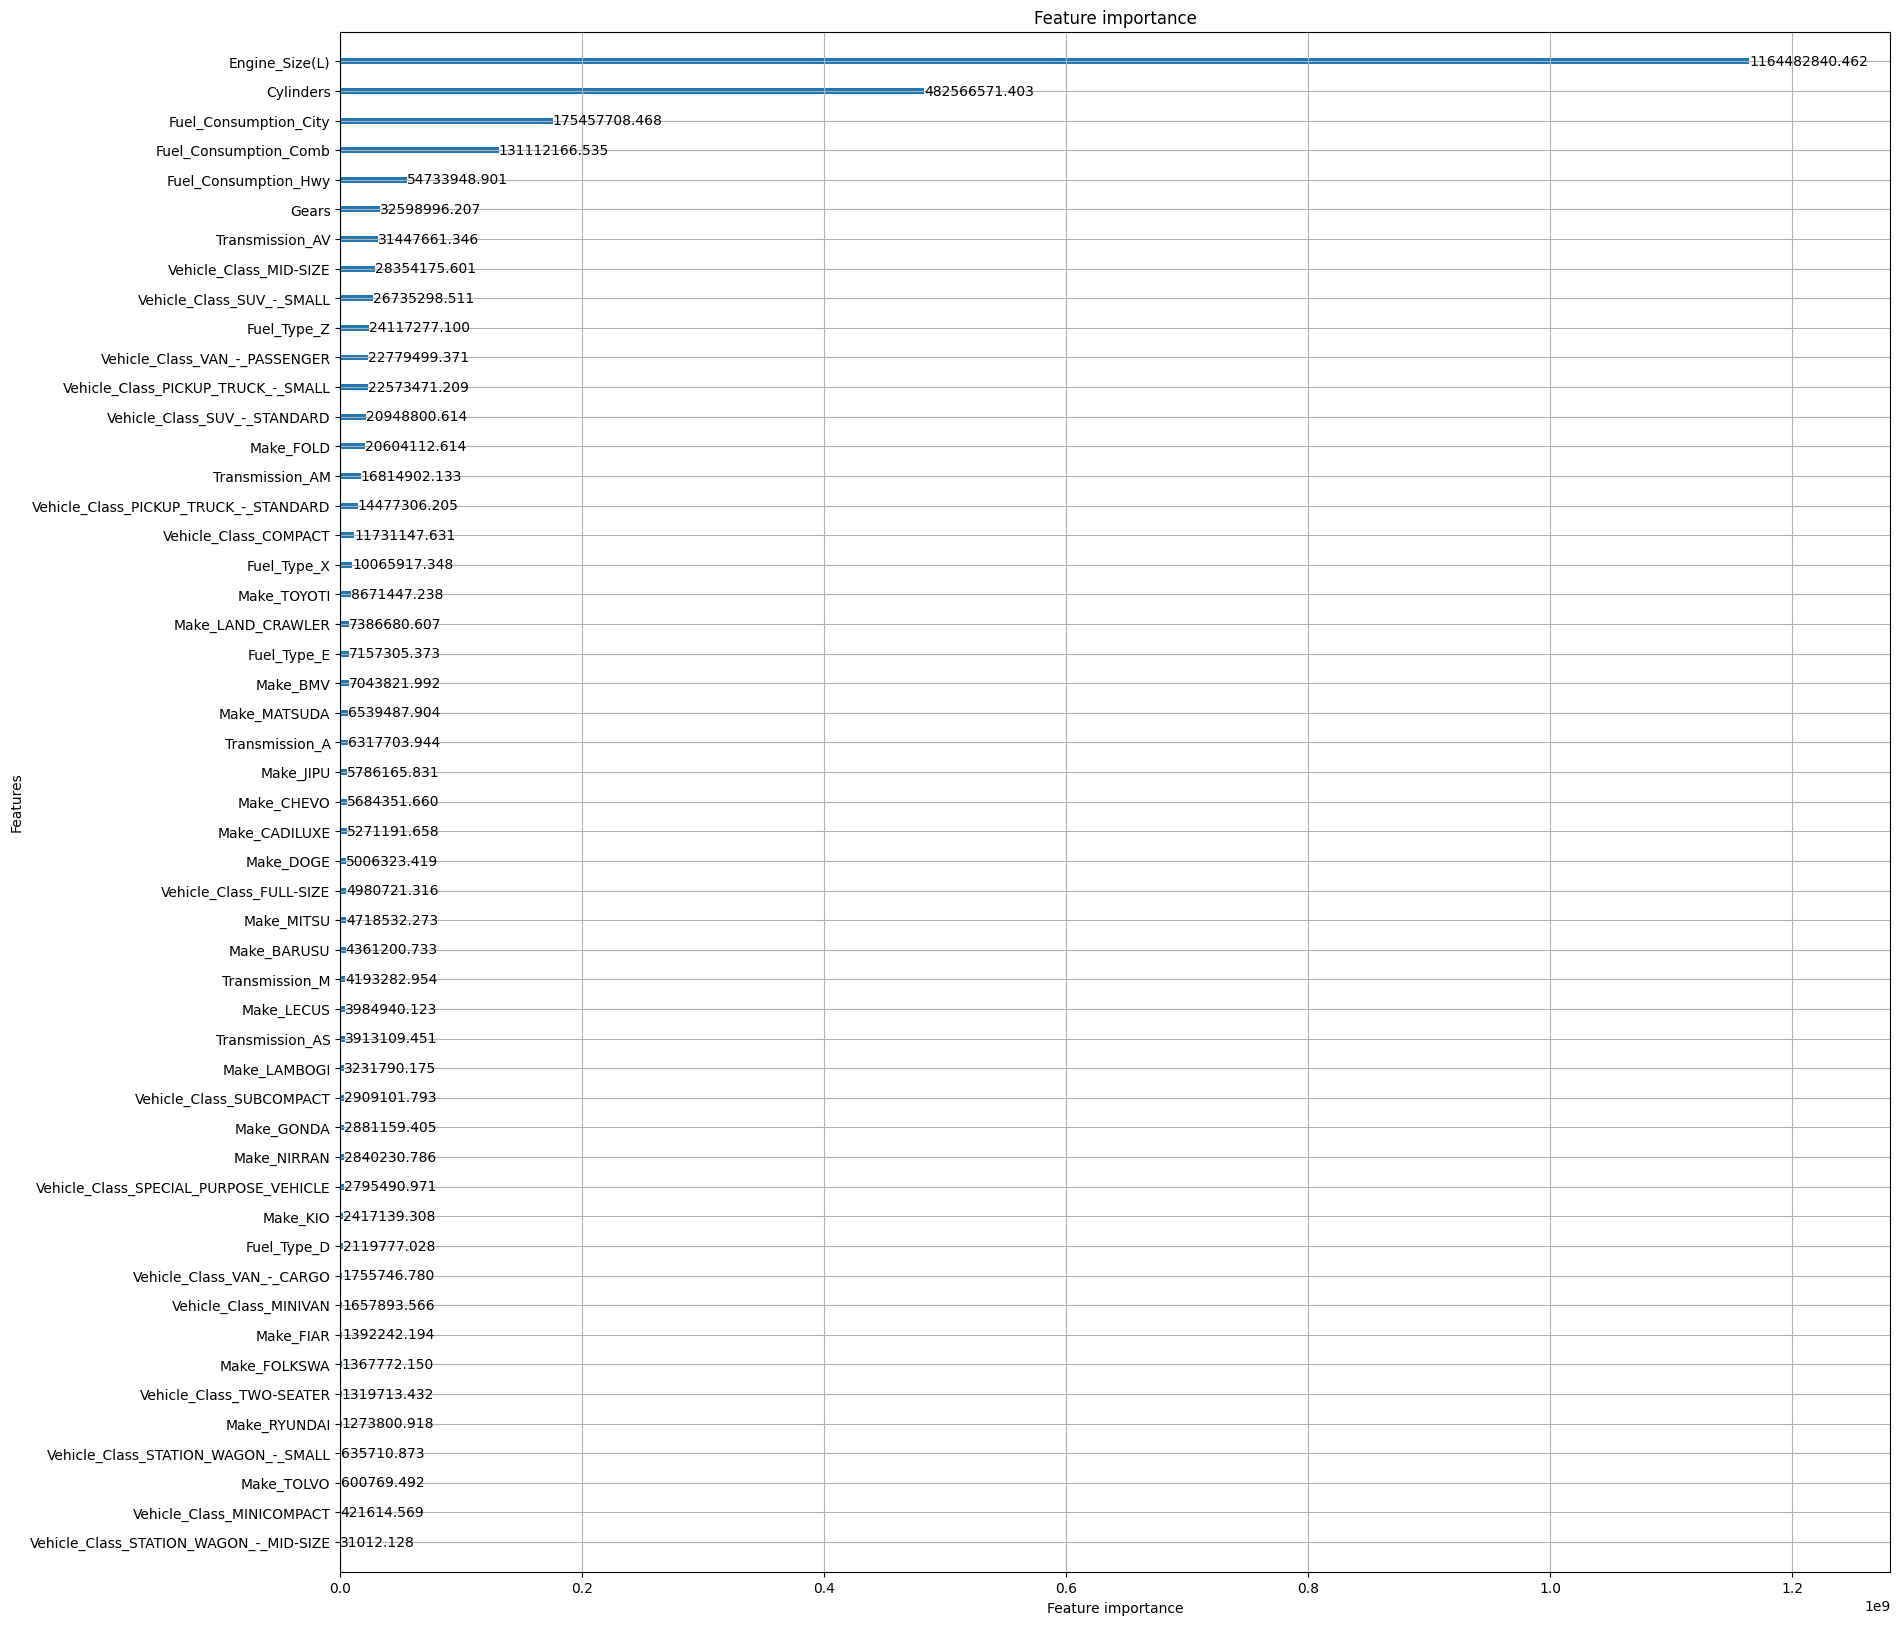

In [52]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(20,20))
plot_importance(best_model,ax=ax,importance_type='gain')

# Prediction and Submission

In [53]:
test_df=pd.read_csv('test.csv')
test_df.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS)
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS)
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km
3,54941,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,NaN,26.43 MPG (AS),NaN
4,54942,BARUSU,COMPACT,2.0,unestablished,M6,Z,11.36 km/L,39.79 mpg Imp.,8.04 L/100km


In [54]:
id_=test_df['Id']
test_df.drop('Id',axis=1,inplace=True)
test_df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS)
1,BMV,COMPACT,2.0,4.0,A8,Z,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS)
2,JIPU,SUV - SMALL,1.3,4.0,A9,X,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km
3,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,NaN,26.43 MPG (AS),NaN
4,BARUSU,COMPACT,2.0,unestablished,M6,Z,11.36 km/L,39.79 mpg Imp.,8.04 L/100km


In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Make                   23545 non-null  object
 1   Vehicle Class          23326 non-null  object
 2   Engine Size(L)         22913 non-null  object
 3   Cylinders              23039 non-null  object
 4   Transmission           23382 non-null  object
 5   Fuel Type              23324 non-null  object
 6   Fuel Consumption City  22861 non-null  object
 7   Fuel Consumption Hwy   22824 non-null  object
 8   Fuel Consumption Comb  22857 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [56]:
test_df['Fuel Type']=test_df['Fuel Type'].apply(lambda x: clean_missing_type(x))
test_df['Vehicle Class']=test_df['Vehicle Class'].apply(lambda x: clean_missing_type(x))
test_df['Transmission']=test_df['Transmission'].apply(lambda x: clean_missing_type(x))

In [57]:
test_df['Gears']=test_df['Transmission'].apply(lambda x: gear_feature(x))
test_df['Gears'].unique()

array([10.,  8.,  9.,  6.,  7.,  5., nan,  4.])

In [58]:
test_df['Engine Size(L)']=test_df['Engine Size(L)'].apply(lambda x: clean_missing_type(x))
test_df['Engine Size(L)']=test_df['Engine Size(L)'].apply(lambda x: float(x))
test_df['Engine Size(L)'].unique()

array([5. , 2. , 1.3, nan, 6.2, 1.8, 4.4, 1.6, 2.4, 3. , 1.4, 6. , 5.2,
       3.5, 3.3, 2.5, 2.3, 3.2, 3.6, 3.8, 1. , 4.8, 2.8, 2.7, 5.6, 1.5,
       5.3, 5.8, 6.6, 5.7, 6.4, 8.4, 4.6, 5.4, 3.7, 4. , 1.2, 4.3, 6.5,
       3.4, 6.8, 2.2, 4.2])

In [59]:
test_df['Cylinders']=test_df['Cylinders'].apply(lambda x: clean_missing_type(x))
test_df['Cylinders']=test_df['Cylinders'].apply(lambda x: float(x))
test_df['Cylinders'].unique()

array([ 8.,  4., nan, 10.,  6.,  3., 12.,  5.])

In [60]:
test_df['Fuel Consumption Hwy']=test_df['Fuel Consumption Hwy'].apply(lambda x: clean_missing_type(x))
test_df['Fuel Consumption Comb']=test_df['Fuel Consumption Comb'].apply(lambda x: clean_missing_type(x))
test_df['Fuel Consumption City']=test_df['Fuel Consumption City'].apply(lambda x: clean_missing_type(x))

In [61]:
test_df['Fuel Consumption City']=test_df['Fuel Consumption City'].apply(lambda x: clean_fuel_unit(x))
test_df['Fuel Consumption Hwy']=test_df['Fuel Consumption Hwy'].apply(lambda x: clean_fuel_unit(x))
test_df['Fuel Consumption Comb']=test_df['Fuel Consumption Comb'].apply(lambda x: clean_fuel_unit(x))

In [62]:
test_df['Transmission']=test_df['Transmission'].apply(lambda x: transmission_feature(x))
test_df['Transmission'].unique()

array(['AS', 'A', 'M', 'AM', 'AV', nan], dtype=object)

In [63]:
test_df['Fuel Consumption City']=np.log(test_df['Fuel Consumption City'])
test_df['Fuel Consumption Comb']=np.log(test_df['Fuel Consumption Comb'])
test_df['Fuel Consumption Hwy']=np.log(test_df['Fuel Consumption Hwy'])

In [64]:
encoded=encoder.transform(test_df[cat_col])
for col in encoded.columns:
  if '_nan' in col:
    encoded.drop(col,axis=1,inplace=True)
encoded.drop('Make_ASURA',axis=1,inplace=True)

test_df.drop(cat_col,axis=1,inplace=True)
test_df=pd.concat([test_df,encoded],axis=1)

In [65]:
scaled=scaler.transform(test_df)
imputed=imputer.transform(scaled)
imputed=scaler.inverse_transform(imputed)
test_df=pd.DataFrame(imputed,columns=test_df.columns)
test_df['Engine Size(L)']=np.round(test_df['Engine Size(L)'],1)

In [66]:
prediction=best_model.predict(test_df)

In [67]:
submission=pd.DataFrame({'Id':id_.to_numpy(),'CO2 Emissions(g/km)':prediction})
submission.head()

,Id,CO2 Emissions(g/km)
0,54938,327.262613
1,54939,197.615465
2,54940,215.006336
3,54941,229.341823
4,54942,232.734450


In [68]:
submission.to_csv('submission.csv',index=False)

In [69]:
import pickle

pickle.dump(best_model, open('Model_HAZ.pkl', 'wb'))